<a href="https://colab.research.google.com/github/charann90/CNN-Image-Classifier/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classifier**

# 1. Setup and load data

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.9.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheControl                  0.12.11
cachetools                    5.3.0
catalogue                     2.0.8
certifi                       2022.12.7
c

In [3]:
import tensorflow as tf
import os

In [4]:
#Avoiding OOM errors by setting GPU memory consumption growth

gpus=tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

# 2. Removing dodgy images

In [5]:
import cv2
import imghdr


In [6]:
!unzip data.zip -d data

Archive:  data.zip
  inflating: data/happy/_happy_jumping_on_beach-40815.jpg  
  inflating: data/happy/05-12-21-happy-people.jpg  
  inflating: data/happy/110754-utyeqqosky-1547658396.jpeg  
  inflating: data/happy/1-2.jpg      
  inflating: data/happy/170404-happy-workers-feature.jpg  
  inflating: data/happy/1902544.jpg  
  inflating: data/happy/1920px-face-smile.svg_.png  
  inflating: data/happy/2560px-Happy_People.jpg  
  inflating: data/happy/35438_hd.jpg  
  inflating: data/happy/427394C200000578-0-image-a-24_1500384481554.jpg  
  inflating: data/happy/56f455011e0000b300705475.jpeg  
  inflating: data/happy/613k1XcpYCL._SL1200_.jpg  
  inflating: data/happy/61vqdCPeKNL.jpg  
  inflating: data/happy/71hBPTAhIXL.jpg  
  inflating: data/happy/7-Habits-of-Happy-People-image.jpeg  
  inflating: data/happy/7-principles-of-successful-and-happy-people.png  
  inflating: data/happy/960x0.jpg    
  inflating: data/happy/988689_Wallpaper2.jpg  
  inflating: data/happy/A_Sep20_14_1189155141

In [7]:
data_dir='data'
image_exts=['jpeg','jpj','bmp','png']

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [9]:
os.listdir(os.path.join(data_dir,'happy'))

['61vqdCPeKNL.jpg',
 'what-makes-people-happy.jpeg',
 'getty_152414899_97046097045006_68075.jpg',
 'happy-people-6075804.jpg',
 '1920px-face-smile.svg_.png',
 'maxresdefault.jpg',
 'shutterstock_1123160147.jpg',
 'happy-indians_5f66fd46d9f5b.jpg',
 'red-heres-why-you-should-pause-and-think-before-ruthlessly-chasing-happiness.jpg',
 'hdptcar-fi-2.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'getty_476846599_970647970450014_65484.jpg',
 'image18.jpeg',
 'images21.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35581971.jpg',
 'GettyImages-565706549-949x534.jpg',
 'Overtly-Cheerful-Primer-Editorials-min.png',
 'happy-people-13772392.jpg',
 '988689_Wallpaper2.jpg',
 'Happy-Guy.jpg',
 'happy-people.jpg',
 'happy.jpg',
 '1-2.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'image30.jpeg',
 '56f455011e0000b300705475.jpeg',
 'istock-508455188-033183f45ba393ed474

In [10]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)

    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)

      if tip not in image_exts:
        print('Image not in extlist {}'.format(image_path))
        os.remove(image_path)

    except Exception as e:
      print('Issue with image {}'.format(image_path))    




Image not in extlist data/happy/56f455011e0000b300705475.jpeg
Image not in extlist data/happy/2560px-Happy_People.jpg
Image not in extlist data/happy/young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in extlist data/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in extlist data/happy/happiness_thumbnail.jpg
Image not in extlist data/happy/cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Image not in extlist data/happy/portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in extlist data/happy/traitshappypeople.jpg.webp
Image not in extlist data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in extlist data/sad/5TRX6BRpc.gif
Image not in extlist data/sad/depressed-man-studio-shot-260nw-404652526.jpg
Image not in extlist data/sad/39843138-sad-man.jpg
Image not in extlist data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in extlist data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg

In [11]:
from matplotlib import pyplot as plt 

In [12]:
img=cv2.imread(os.path.join('data','happy','happy-people.jpg'))


In [13]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
img.shape

(600, 1400, 3)

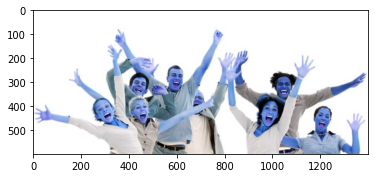

In [15]:
plt.imshow(img)


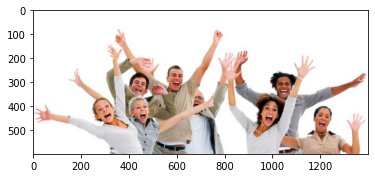

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Load Data

In [22]:
import numpy as np

In [23]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 170 files belonging to 2 classes.


In [24]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
#converting to numpy iterator
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [34]:
batch[0].shape

255.0

In [40]:
batch[0].max()

1.0

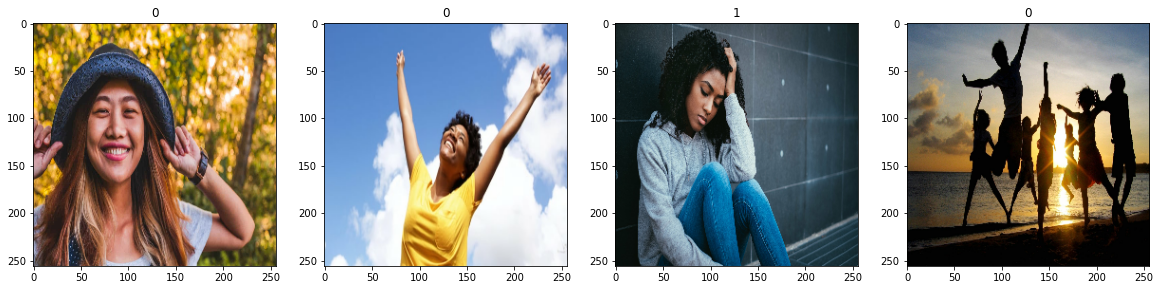

In [33]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Data Preproccesing

In [35]:
data= data.map(lambda x,y: (x/255 ,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [38]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

In [39]:
batch[0].max()

1.0

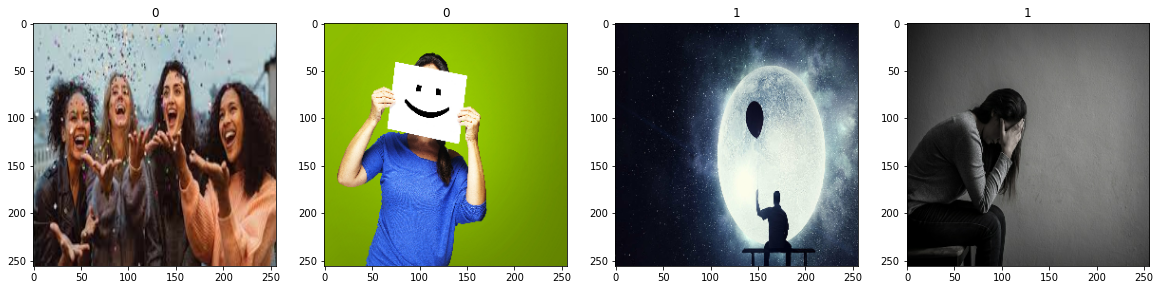

In [42]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# Splitting Data

In [43]:
len(data)

6

In [57]:
train_size=int(len(data)* 0.6)
val_size= int(len(data)*0.3)+1
test_size=int(len(data)*0.1)+1

In [60]:
test_size

1

In [61]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [62]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Deep Model Building

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [82]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))







In [83]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Training

In [85]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 18s 5s/step - loss: 1.5753 - accuracy: 0.5104 - val_loss: 2.1578 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 19s 7s/step - loss: 1.4797 - accuracy: 0.4167 - val_loss: 0.6426 - val_accuracy: 0.6719
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 0.6775 - accuracy: 0.5417 - val_loss: 0.5869 - val_accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 14s 4s/step - loss: 0.6791 - accuracy: 0.5833 - val_loss: 0.6497 - val_accuracy: 0.5625
Epoch 5/20
3/3 [==============================] - 14s 5s/step - loss: 0.6421 - accuracy: 0.6354 - val_loss: 0.6174 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 16s 5s/step - loss: 0.5885 - accuracy: 0.6771 - val_loss: 0.6161 - val_accuracy: 0.5938
Epoch 7/20
3/3 [==============================] - 14s 4s/step - loss: 0.6010 - accuracy: 0.5729 - val_loss: 0.5314 - val_accuracy: 0.7344
Epoch 8/20
3/3 [==================

# Plotting Performance

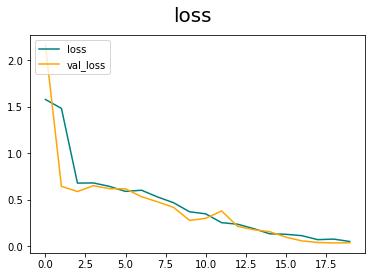

In [90]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

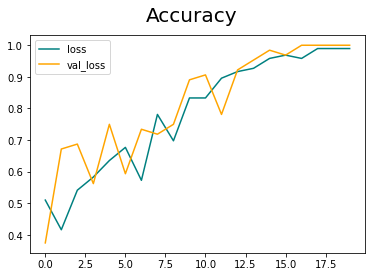

In [91]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Performance Evaluation

In [92]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [93]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [100]:
for batch in test.as_numpy_iterator():
  x,y=batch
  y_pred=model.predict(x)
  pre.update_state(y,y_pred)
  re.update_state(y,y_pred)
  acc.update_state(y,y_pred)

print(f'Precision: {pre.result().numpy()}',f'Recall: {re.result().numpy()}',f'Accuracy: {acc.result().numpy()}')

1/1 [==============================] - 0s 223ms/step
Precision: 1.0 Recall: 1.0 Accuracy: 1.0


Evaluating the prediction by comparing single image

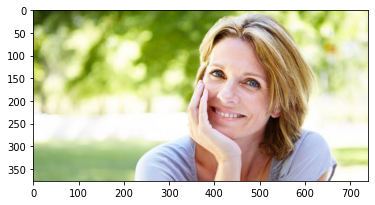

In [106]:
img=cv2.imread(os.path.join('data','happy','happy-people2.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [118]:
resize=tf.image.resize(img,(256,256))


In [119]:
resize.shape

TensorShape([256, 256, 3])

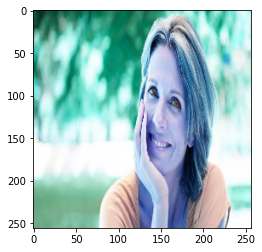

In [120]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [121]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 21.       ,  94.       ,  68.       ],
        [ 17.966507 ,  90.96651  ,  64.96651  ],
        [ 14.482254 ,  84.482254 ,  61.482254 ],
        ...,
        [176.24431  , 244.79118  , 237.79118  ],
        [168.97685  , 244.34375  , 236.50781  ],
        [164.06761  , 242.54027  , 235.54027  ]],

       [[ 20.329788 ,  93.32979  ,  67.32979  ],
        [ 16.61914  ,  89.61914  ,  63.61914  ],
        [ 13.564453 ,  83.56445  ,  60.564453 ],
        ...,
        [179.0952   , 245.       , 238.51512  ],
        [169.80426  , 244.34375  , 236.50781  ],
        [159.59795  , 241.7249   , 234.01591  ]],

       [[ 18.873047 ,  91.87305  ,  65.87305  ],
        [ 15.146484 ,  88.146484 ,  62.146484 ],
        [ 13.2734375,  83.27344  ,  60.273438 ],
        ...,
        [185.22935  , 246.50279  , 240.68443  ],
        [173.89207  , 244.71925  , 237.68945  ],
        [158.       , 243.18164  , 234.81836  ]],

       ...,

     

In [116]:
np.expand_dims(resize/255,0).shape

(1, 256, 256, 3)

In [122]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 70ms/step


In [123]:
yhat

array([[0.02524352]], dtype=float32)

In [125]:
if yhat>0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')


Predicted class is happy


# Saving the model

In [126]:
from tensorflow.keras.models import load_model

In [127]:
model.save(os.path.join('data','happyandsad.h5'))

In [128]:
new_model=load_model(os.path.join('data','happyandsad.h5'))

In [130]:
new_model

In [129]:
ypred_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 115ms/step


In [131]:
ypred_new

array([[0.02524352]], dtype=float32)

In [132]:
if yhat>0.5:
  print(f'Predicted class is sad')
else:
  print(f'Predicted class is happy')

Predicted class is happy
